# gpu_ice package demo

## Introduction
The wait time of correcting HiC raw matrix is no doubt much shorter than the timing for the mapping and filtering reads from HiC experiment. Using the current Cython optimized ICE correction, the timing for correcting a high resolution contact matrix has been significantly imporved from hours of the original one to half an hour. Since the graphic card, GPU, is eceptionally good at doing matrix (or elementwise) computation, I am testing how far the GPU can boost the correction process; how much GPU can satisfy our craving for viewing a high resolution contact map. Using a commonplace GPU, the correction time can be cut down to fewer than a minute. Together, embracing the power of GPU computing engine, manipulating and visulaizing high resolution HiC matrix are performed in realtime.

## Quick Look

The module uses the Accelerate and Numba modules in Anaconda to programm the GPU. More information about
the dependencies can be found in the Installation section.

In [1]:
import gpu_ice

Setup the inline plotting environment for visulizing contact maps

In [2]:
%matplotlib notebook

The ICE normalization functions are wrapped in the ice_norm object. Initialize an ice_norm object by specifying the matrix file in triplet format. In the example, an instance of ICE correction for a raw matrix in 10kb resolution has been created. The raw matrix are built by HiC-Pro pipeline from CH12-LX HiC data from Rao, 2014 cell paper.

In [3]:
rep1_ice_norm = gpu_ice.ice_norm("rep1_10000.matrix")

Load the matrix and transfer it into the device (GPU) memory. The device memory usage will be discussed in the documentation session. Also, it will cover the details of runing the program in split mode, analysing by chuncks to reduce device memory usage.

In [4]:
rep1_ice_norm.make_matrix()

Matrix properties:
size: 265503 X 265503
non-zero elements: 388661243
sparsity: 0.005513563362932332
sequence depth: 406869792.0


Matrix properties are returned for further reference.

Before we do ICE, we can take a quick look of the raw matrix, the starting point. And you can always reset the normalized matrix back to raw...

<IPython.core.display.Javascript object>


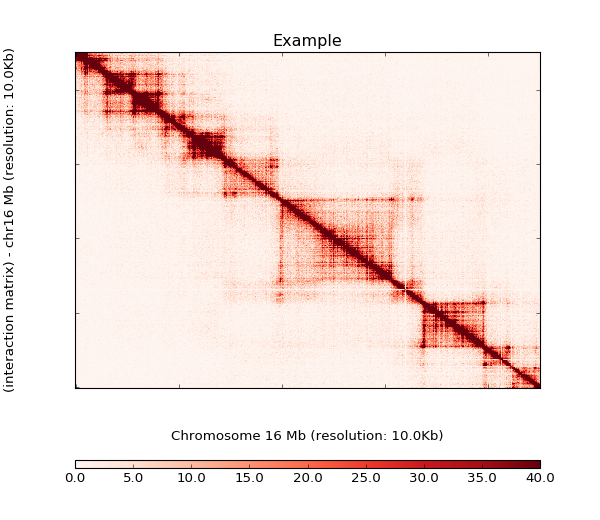

In [5]:
rep1_ice_norm.plotHeatmap_on_the_fly(chromosome='chr16', resolution=10000, names='Example', start=2200, end=2650, 
                            tripleColumn=1, bedFile='rep1_10000_abs.bed', matrixMax = 40, upSide=1,heatmapColor=1)

The raw matrix are corse, especially the dots, interactions, are buried. We will do matrix correction which are performed in GPU and times the process. Let's do 1 round ICE to get the baseline of the speed. 

In [6]:
%time rep1_ice_norm.ice(epoches=1)

@ 1 round iteration, current eps: 124565.0
CPU times: user 724 ms, sys: 208 ms, total: 932 ms
Wall time: 931 ms


One round of ICE takes roughly 1 second on a 265503X265503 sparse matrix with 388661243 elements. I am also curious how 1 iteraction can do to the raw matrix. Plot the same region to compare.

<IPython.core.display.Javascript object>


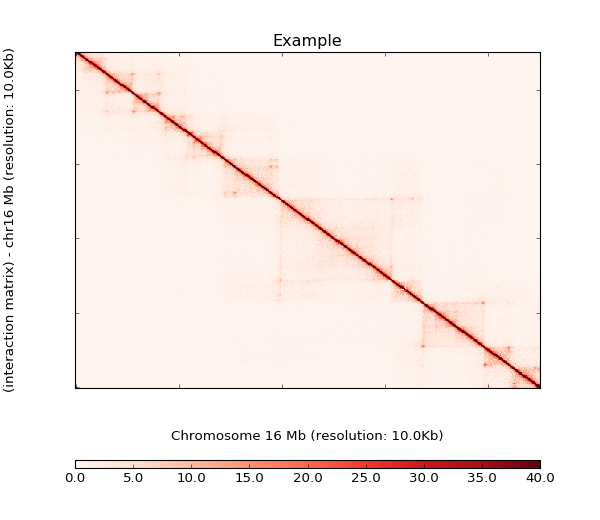

In [7]:
rep1_ice_norm.plotHeatmap_on_the_fly(chromosome='chr16', resolution=10000, names='Example', start=2200, end=2650, 
                            tripleColumn=1, bedFile='rep1_10000_abs.bed', matrixMax = 40, upSide=1,heatmapColor=1)

The noise of the matrix is reduced hugely. But the features are still blurry. We will do 20 more iteration to see what will happen. Same, we will time the process to show the performance of the GPU.

In [8]:
%time rep1_ice_norm.ice(epoches=20)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Matrix had been ICE normalized before. Further ICE will perform on
the existed normalized matrix. To start from raw matrix, call the
make_matrix method with reset=1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
@ 1 round iteration, current eps: 83602.7
@ 20 round iteration, current eps: 217.385
CPU times: user 10.8 s, sys: 2.68 s, total: 13.5 s
Wall time: 13.5 s


You need to wait 14 seconds for 20 more rounds ICE. Get yourself ready for the high resolution contact map in that 14 seconds.

<IPython.core.display.Javascript object>


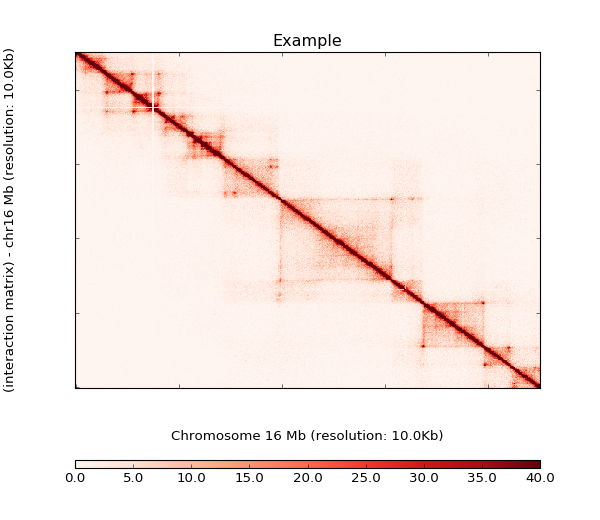

In [9]:
rep1_ice_norm.plotHeatmap_on_the_fly(chromosome='chr16', resolution=10000, names='Example', start=2200, end=2650, 
                            tripleColumn=1, bedFile='rep1_10000_abs.bed', matrixMax = 40, upSide=1,heatmapColor=1)

Let the figure talk itself.

## Installation

The programs relies on the Accelerate and Numba modules in Anaconda to programm the GPU. Anaconda provides free academic subscriptions. Find the installation information of Accelerate and Anaconda from the [link](https://docs.continuum.io/accelerate/#installation). Once you have the prerequisition, copy the script folder and import the gpu_ice to run the matrix correction processes. All programs are running under python3.

## Author

Hanbin Lu, hal213@ucsd.edu